# Learning Python's _pandas, NumPy_ and _Matplotlib_

(Learning from _Python for Data Analysis_ by Wes McKinney, Towards Data Science article [Matplotlib VS Ggplot2](https://towardsdatascience.com/matplotlib-vs-ggplot2-c86dd35a9378))

* _pandas_ documentation: https://pandas.pydata.org/pandas-docs/stable/index.html

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib as matplotlib
for lib in np, pd, matplotlib:
    print(f'{lib.__name__:10} {lib.__version__}')

numpy      1.20.1
pandas     1.2.2
matplotlib 3.3.4


Example on how to import datasets for ML:

In [3]:
from sklearn import datasets

# Load data (sklearn.utils.Bunch)
iris = datasets.load_iris()
boston = datasets.load_boston()
type(iris)

sklearn.utils.Bunch

Bunch is a Python dictionary that provides attribute-style access (i.e. JavaScript objects). It acts like an object and a dict.

## Other libraries

### Datetime

In [ ]:
# Access components of a date (yr, month, day)
# df["submission_datetime"].dt.component
# df["submission_datetime"].dt.year

### CSV

In [ ]:
import pandas as pd

# csv to dataframe
df = pd.read_csv("\path\to\file.csv")
# dataframe to csv
df.to_csv("\save\as\file.csv")

In [ ]:
# Reading a csv with datetime string
# pd.read_csv(..., parse_dates=["Date"]).sort_values("Date")

### Random numbers

Random generators.

In [ ]:
np.random.rand() # pseudo random nums
np.random.seed(123) # random seed set as 123, ensures reproducibility
np.random.randint(0, 2) # randomly generate 0 or 1 (right-exclusive range)

* Random walk: sequence of random steps

## Helper functions

In [4]:
# Display pandas tables side by side
# Source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

## Dataframe constructors

In [5]:
# Define from scratch
    # Dictionary of colname:arr_of_colvalues
df = pd.DataFrame({
     'cola':[1, 3, 2, 4, 6],
     'colb':[12, 9, 16, 7, 5],
     'colc':['a','b','a','a','b']
})
df

,cola,colb,colc
0,1,12,a
1,3,9,b
2,2,16,a
3,4,7,a
4,6,5,b


In [ ]:
# Define element by element
    # List of dictionaries
dff = pd.Dataframe([
    {'col1': 'value1,1', 'col2': 'value1,2'},
    {'col1': 'value2,1', 'col2': 'value2,2'}
])

In [6]:
# Converting from sklearn dataset (i.e. Bunch)
from sklearn.datasets import load_wine
wine = load_wine()
wine_df = pd.DataFrame(wine.data,
                      columns=wine.feature_names)
print(wine_df.shape)
wine_df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Common functions

In [ ]:
df.head()
df.info()
df.shape() # attribute, not method
df.describe()

Components of dataframe:

In [ ]:
df.values
df.columns # colnames
df.index # row numbers/names

Subsetting dataframes:

In [ ]:
df["cola"]
df[["cola", "colb"]] # outer []: subset dataframe
                     # inner []: list of colnames to subset
df[(df["cola"] > 1) & (df["colc"] == "a")] # subsetting more than 1 condition requires brackets ()
df["colc"].isin(["category1", "catgory2"])

Summary statistics:

In [ ]:
# .mean(), .median(), .mode(), .min(), .max(), .var(), .std(), .sum(), .quantile()
df["cola"].mean()

def function1(input_col):
    """ A custom summary function """
    return 0
def pct30(input_col):
    """ Finds the 30th percentile of given column """
    return 0
def pct40(input_col):
    """ Finds the 40th percentile of given column"""
    return 0

df["colc"].aggregate(function1) # allows computation of custom summary statistics
df["colc"].aggregate([pct30, pct40])

# .cumsum(), .cummax(), .cummin(), .cumprod()
def["cola"].cumsum()

Counting values in columns:

In [ ]:
df.drop_duplicates(subset="cola")
df.drop_duplicates(subset=["cola", "colb"])

df["cola"].value_counts()
df["cola"].value_counts(sort=True) # sort counts in descending order
df["cola"].value_counts(normalize=True)

Renaming column names:

In [ ]:
# Example: replace column name 'cola' with 'A'
# df.columns = df.columns.str.replace("cola", "A")

Looping over dataframes:

In [ ]:
# for label, row in df.iterrows():
#     ...

Looping over numpy arrays:

In [ ]:
# For 1D numpy array
# for val in arr:
#     ...

# For 2D numpy arrays
# for val in np.niter(arr):
#     ...

Adding columns:

In [ ]:
# Example: create a new Series on every iteration
    # Not efficient if data is large
# for label, row in df.iterrows():
#     df.loc[label, "newcol"] = len(row["colname"])

# Alternative
    # More efficient
# df["newcol"] = df["colname"].apply(len)

## Pivot Tables

Also used to calculate grouped summary statistics.

| Parameters of `pivot_table()` | Used for |
| --- | --- |
| `index` | column to use as index of pivot table |
| `values` | column(s) to aggregate |
| `aggfunc` | function to apply for aggregration |
| `columns` | categories as columns of pivot table |

In [ ]:
# takes mean of each group (default)
    # values: column to be summarised
    # index: column to group by
df.pivot_table(values="cola", index="colc")

# specify summary statistic(s)
df.pivot_table(values="cola", index="colc", aggfunc=np.median)
df.pivot_table(values="cola", index="colc", aggfunc=[np.median, np.mean])

# Equivalent to df.groupby(["colc", "colb"])["cola"].mean()
    # fill_value: replaces NA values with specified value
    # margins: mean of all rows and columns
df.pivot_table(values="cola", index="colc", columns="colb", fill_value=0, margins=True)

## Explicit Indexes

In [ ]:
df.set_index("cola") # set colname as index
df.reset_index() # remove index
df.reset_index(drop=True) # drop index

# filter on index values
    # makes subsetting easier
    # index values does not have to unique
#df.loc[[index_values]]

Multi-indexes/hierarchical indexes:

In [ ]:
# Set colb as nested inside of cola
df.set_index(["cola", "colb"])

# Setting list of index values of outer level
#df.loc[[outerlevel_index_values]]

# Setting index values of outer and inner level
#df.loc[[(outer1, inner1), (outer2, inner2)]]

Sorting:

In [ ]:
# Sorts all index levels from outer to inner, in ascending order
df.sort_index()
# Control way to sort
    # cola: outer level
    # colb: inner level
df.sort_index(level=["cola", "colb"], ascending=[True, False])

## Missing values

_NaN_ is not a number.

Not ideal to drop _NaN_ values especially if there is alot of missing data. This can introduce bias to data if values are not missing at random.

In [ ]:
# Returns True if CELL is empty, else False
df.isna()
# Returns True if at least 1 entry in EACH COLUMN is empty
df.isna().any()
# Returns number of NA values in EACH COLUMN
df.isna().sum()

# Remove missing values
df.dropna()
# Replace missing values
df.fillna(0)

# Plot
df.isna().sum().plot(kind="bar")

## Merging dataframes

Using _pandas_.

### Arithmetic with _Series_ and _Dataframes_

In [ ]:
# Element-wise summation
    # Index of sum is union of row indices from df1 and df2
    # NaN value if index appears in only 1 dataframe
        # Soln: df1.add(df2, fill_value=0)
# df1 + df2
# df1.add(df2)
# df1.add(df2, fill_value=0).add(df3, fill_value=0)

# Scalar multiplication
# df.loc["cola", "colb"] * 3

# Element-wise multiplication of dataframes
# df1.multiply(df2, axis="rows")

# Element-wise division
# df1.divide(df2, axis="rows")

# Percentage % changes
# df["cola"].pct_change() * 100

### Appending and concatenating _Series_

In [ ]:
# Append to first series
    # Row-wise
# s1.append(s2)
# s1.append(s2).reset_index(drop=True) # Discard repeated index and replace with new indexes

# Pandas module function
    # More flexibility
# pd.concat([s1, s2, s3])

### Appending and concatenating _Dataframes_

In [ ]:
# UNION of entries from both dataframes
    # Default: axis=0
    # Function with most flexibility
# pd.concat([df1, df2], axis=0)
    # Stacking rows vertically at the bottom
    # Equivalent to axis="rows"
# pd.concat([df1, df2], axis=1) # concat columns

In [ ]:
# Specific case of CONCAT i.e. (axis=0, join='outer')
# df1.append(df2)
# df1.append(df2, ignore_index=True)

Stack arrays **horizontally**:

In [6]:
# Arrays should have same number of rows
a1 = [1, 2, 3]
a2 = [4, 5, 6]
np.hstack([a1,a2])

array([1, 2, 3, 4, 5, 6])

In [7]:
np.concatenate([a1,a2], axis=0) # default

array([1, 2, 3, 4, 5, 6])

Stack arrays **vertically**:

In [8]:
# Arrays should have the same number of columns
np.vstack([a1,a2])

array([[1, 2, 3],
       [4, 5, 6]])

In [14]:
a3 = [[2, 4], [6, 8]]
a4 = [[1, 3], [5, 7]]
np.concatenate([a3,a4], axis=1)

array([[2, 4, 1, 3],
       [6, 8, 5, 7]])

ValueError exception raised if arrays have incompatible dimensions.

### Concatenate dictionary of dataframes

In [ ]:
# Keys of dict treated as keys in pd.concat
rain_dict = {2013: df1, 2014: df2}
pd.concat(rain_dict, axis="columns")

#            2013            2014
#        df1_colnames    df2_colnames
# Jan         ...             ...
# Feb         df1             df2
# Mar         ...             ...

### Joining dataframes

**`concat()`**

* Outer join: Preserves indices in _original tables_ (no repetition), filling null values for missing rows
* Inner join: Intersection of index sets (only common labels)

In [ ]:
# Joins on columns (OUTER JOIN)
# pd.concat([df1,df2], axis=1, join="outer")

In [ ]:
# Join on rows (INNER JOIN)
# pd.concat([df1, df2], axis=0, join="inner")

**`merge()`**

* `merge()` extends `concat()` with the ability to align rows using multiple columns.

In [ ]:
# Merge on ALL columns that occur in both dataframes
# pd.merge(df1, df2)

In [ ]:
# Equivalent to INNER JOIN
# pd.merge(df1, df2, on=["cola", "colb"]) # merge on specific columns
# pd.merge(df1, df2, on="cola", suffixes=["_A", "_B"]) # suffixes replace _x, _y
# pd.merge(df1, df2, left_on="df1_cola", right_on="df2_colb") # match columns from different dataframes (by=c("A"="B"))

In [ ]:
# pd.merge(df1, df2, on= ..., suffixes= ..., how='left')
    # like an inner join (by default)

In [ ]:
# pd.merge(df1, df2, how="outer").sorted_values("Date")

**`merge_ordered()`**

In [ ]:
# OUTER join by default
# pd.merge_ordered(df1, df2)
# pd.merge_ordered(df1, df2, on=[...], suffixes=['...', ...])

# Specify interpolation method for data
# pd.merge_ordered(df1, df2, on=..., fill_method='ffill')

**`join()`**

In [ ]:
# Left join (by default)
# df1.join(df2)

# Right join
# df1.join(df2, how="right")

# Inner join
# df1.join(df2, how="inner")

# Outer join
# df1.join(df2, how="outer")

In [ ]:
# Random code snippet
    # Get data from last day of every year
    # "A": annual frequency
    # .last(): latest data
    # yearly = df.resample("A").last()

## Concatenation, keys and multi-indexes

**Multi-index on rows:**

When 2 dataframes have
* same index (e.g. Jan, Feb, Mar)
* different year (e.g. 2014, 2015)
* same columns

In [ ]:
# Outer index labels [2014, 2015] maps to -> [df1, df2]
# pd.concat([df1,df2], keys=[2014,2015], axis=0)

# 2014    Jan    ...
#         Feb    ...
#         Mar    ...
# 2015    Jan    ...
#         Feb    ...
#         Mar    ...

**Multi-index on columns:**

In [ ]:
# pd.concat([df1,df2], keys=[2014,2015], axis="columns")

#        2014   2015
#        cola   colb
# Jan    ...    ...
# Feb    ...    ...
# Mar    ...    ...

**Slice _inner_ of a multi-index:**

In [ ]:
# idx = pd.IndexSlice
# df.loc[idx[:,"innerlevel"],:]

## Summary of combining dataframes

| Function | What it's good for | Example |
| --- | --- | --- |
| `.append()` | Stacking vertically | `df1.append(df2)` |
| `pd.concat()` | Stacking many horizontally/vertically | `pd.concat([df1,df2])` |
| | Simple inner/outer joins on indexes | |
| `.join()` | Inner/outer/left/right joins on indexes | `df1.join(df2)` |
| `pd.merge()` | Many joins on multiple columns | `pd.merge([df1,df2])` |

## Method Chaining

| `pandas` function | Description | _R_-equivalent |
| --- | --- | --- |
| [`assign`](#assign)| Returns a new object with all original columns in addition to new one (will overwrite re-assigned columns) | `mutate` |
| [`query`](#query)| Query the columns of a DataFrame with boolean expression(s), filters rows that match expression(s) | `filter` |
| [`sort_values`](#sort_values)| Sort by the values along either axis | `arrange` |
| [`groupby`](#groupby)| Group DataFrame using a mapper or by a Series of columns | `groupby` |
| [`agg`](#agg)| Aggregate using one or more operations over the specified axis | `summarise` |
| [`rename`](#rename)| Alter axis labels | |
| [`rename_axis`](#rename_axis)| Set the name of the axis for the index/columns | |
| [`apply`](#apply)| Apply a function along an axis of the DataFrame (**row/column basis** of DataFrame), returns a `Series` by default | |
| [`applymap`](#applymap)| Apply a function to a DataFrame **element-wise**, returns a transformed DataFrame | |
| [`fillna`](#fillna) | Fill `NA`/`NaN` values using the specified method | Using `mutate` with an `if-else` and `is.na` |
| [`dropna`](#dropna) | Remove missing values | `na.omit` |
| [`reset_index`](#reset_index) | Reset the index, or a level of it | |
| [`pivot_table`](#pivot_table) | Create a spreadsheet-style pivot table as a DataFrame | |
| [`value_counts`](#value_counts) | Return a Series containing unique rows in the DataFrame | `table`|
| [`loc`](#loc)| Access a group of rows and columns by label(s) or a boolean array | `select` |
|[`drop`](#drop)| Drop specified labels from rows or columns | negative `select` (drop columns) |
| [`pipe`](#pipe) | Apply func (use when chaining together functions that expect `Series`, `DataFrames`,  `GroupBy` objects)| |

If `inplace=True` (not default), function will return `None`.

### `assign`

[_Back to top_](#Method-Chaining)

In [7]:
# 1 - column name callable directly
df.assign(add_one=df.cola + 1)
# 2 - directly reference (another) Series
df.assign(add_one=df['cola'] + 1)

,cola,colb,colc,add_one
0,1,12,a,2
1,3,9,b,4
2,2,16,a,3
3,4,7,a,5
4,6,5,b,7


In [8]:
# 3 - multiple columns (new column depend on another new column defined)
#   - using lambda
df.assign(add_one=lambda x: x['cola'] + 1,
          concat_str=lambda x: x['add_one'].map(str) + '_str')

,cola,colb,colc,add_one,concat_str
0,1,12,a,2,2_str
1,3,9,b,4,4_str
2,2,16,a,3,3_str
3,4,7,a,5,5_str
4,6,5,b,7,7_str


### `query`

[_Back to top_](#Method-Chaining)

For columns with spaces in their name, use backtick quoting.

In [9]:
df.query('cola > colb')
# Equivalent
df[df.cola > df.colb]

,cola,colb,colc
4,6,5,b


In [10]:
# Multiple expressions
df.query('cola >= 2 and colc == "a"')
# Equivalent
df[(df['cola'] >= 2) & (df['colc'] == 'a')]

,cola,colb,colc
2,2,16,a
3,4,7,a


### `sort_values`

[_Back to top_](#Method-Chaining)

Sort by:
1. ascending, descending (`ascending=True/False`, default=`True`)
2. position of rows with missing values (`na_position='first'/'last'`, default=`last`)
3. specified key function (i.e `lambda`)

In [11]:
df

,cola,colb,colc
0,1,12,a
1,3,9,b
2,2,16,a
3,4,7,a
4,6,5,b


In [12]:
df.sort_values(by=['cola'])
# Multiple columns
df.sort_values(by=['cola', 'colc']) # look at subsequent column if tie-breaker
df.sort_values(by=['cola', 'colc'], ascending=[True, False])

,cola,colb,colc
0,1,12,a
2,2,16,a
1,3,9,b
3,4,7,a
4,6,5,b


In [13]:
df.sort_values(by='cola', ascending=False) # default True
# Sort multiple columns with different sort orders
df.sort_values(by=['cola', 'colb'],
              ascending=[False, True])

,cola,colb,colc
4,6,5,b
3,4,7,a
1,3,9,b
2,2,16,a
0,1,12,a


In [14]:
# Put NAs first
sample_df = pd.DataFrame({
    'col1': ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col2': [2, 1, 9, 8, 7, 4],
    'col3': [0, 1, 9, 4, 2, 3],
    'col4': ['a', 'B', 'c', 'D', 'e', 'F']
})
sorted_df = sample_df.sort_values(by='col1', na_position='first')
display_side_by_side(sample_df, sorted_df)

,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F
,col1,col2,col3,col4
3,NaN,8,4,D
0,A,2,0,a
1,A,1,1,B


In [15]:
# Sort with key function (use sorted builtin function)

# See input params of function
import inspect
print(inspect.getfullargspec(pd.DataFrame.sort_values))

# Requires python version > 1.1
sample_df.sort_values(by='col4', key=lambda col: col.str.lower())

FullArgSpec(args=['self', 'by', 'axis', 'ascending', 'inplace', 'kind', 'na_position', 'ignore_index', 'key'], varargs=None, varkw=None, defaults=(0, True, False, 'quicksort', 'last', False, None), kwonlyargs=[], kwonlydefaults=None, annotations={'key': 'ValueKeyFunc'})


,col1,col2,col3,col4
0,A,2,0,a
1,A,1,1,B
2,B,9,9,c
3,NaN,8,4,D
4,D,7,2,e
5,C,4,3,F


### `groupby`

[_Back to top_](#Method-Chaining)

In [16]:
birds_df = pd.DataFrame({
    'Animal': ['Falcon', 'Falcon', 'Parrot', 'Parrot'],
    'Max Speed': [380., 370., 24., 26.]
})
birds_df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [17]:
birds_df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


### `agg`

[_Back to top_](#Method-Chaining)

An alias for `aggregate`.

In [18]:
# Aggregate over rows
df.agg(['sum', 'min'])

,cola,colb,colc
sum,16,49,abaab
min,1,5,a


In [19]:
# Aggregate over columns
df.iloc[:,:2].agg(np.mean)

cola    3.2
colb    9.8
dtype: float64

In [20]:
# Aggregate over columns (different aggregation per column)
df.agg({'cola': [np.sum, np.min],
        'colb': ['max', 'count'],
        'colc': [np.min]
       })

,cola,colb,colc
sum,16.0,NaN,NaN
amin,1.0,NaN,a
max,NaN,16.0,NaN
count,NaN,5.0,NaN


### `rename`

[_Back to top_](#Method-Chaining)

Rename either column names or index names.

In [21]:
# Rename column names using mapping
# {'old_colname':'new_colname'}
df.rename(columns={'cola':'A', 'colc':'C'})

,A,colb,C
0,1,12,a
1,3,9,b
2,2,16,a
3,4,7,a
4,6,5,b


In [22]:
# Rename multiple column names
df.rename(str.upper, axis='columns')

,COLA,COLB,COLC
0,1,12,a
1,3,9,b
2,2,16,a
3,4,7,a
4,6,5,b


In [23]:
# Rename index using mapping
df.rename(index={0:'a'})
# Equivalent
df.rename({0:'a'}, axis='index')

,cola,colb,colc
a,1,12,a
1,3,9,b
2,2,16,a
3,4,7,a
4,6,5,b


In [24]:
# Recast index labels to different type
print(df.index) # range
print(df.rename(index=str).index) # string

RangeIndex(start=0, stop=5, step=1)
Index(['0', '1', '2', '3', '4'], dtype='object')


### `rename_axis`

[_Back to top_](#Method-Chaining)

Renames the row and column index.

In [25]:
census = pd.DataFrame({'age':[30, 2, 12],
                       'color':['blue', 'green', 'red'],
                       'food':['Steak', 'Lamb', 'Mango'],
                       'height':[165, 70, 120],
                       'score':[4.6, 8.3, 9.0],
                       'state':['NY', 'TX', 'FL']},
                       index = ['Jane', 'Nick', 'Aaron'])
census

,age,color,food,height,score,state
Jane,30,blue,Steak,165,4.6,NY
Nick,2,green,Lamb,70,8.3,TX
Aaron,12,red,Mango,120,9.0,FL


In [26]:
(census.rename_axis('names')
       .rename_axis('attributes', axis='columns'))

attributes,age,color,food,height,score,state
names,,,,,,
Jane,30,blue,Steak,165,4.6,NY
Nick,2,green,Lamb,70,8.3,TX
Aaron,12,red,Mango,120,9.0,FL


### `apply`

[_Back to top_](#Method-Chaining)

In [27]:
numerics_df = df[['cola', 'colb']]
numerics_df

,cola,colb
0,1,12
1,3,9
2,2,16
3,4,7
4,6,5


In [28]:
# Apply a universal function on all columns
numerics_df.apply(np.sqrt)

,cola,colb
0,1.000000,3.464102
1,1.732051,3.000000
2,1.414214,4.000000
3,2.000000,2.645751
4,2.449490,2.236068


In [29]:
# Apply function across rows (colsum)
numerics_df.apply(np.sum, axis=0) # default

cola    16
colb    49
dtype: int64

In [30]:
# Apply function across cols (rowsum)
numerics_df.apply(np.sum, axis=1)

0    13
1    12
2    18
3    11
4    11
dtype: int64

Options for `result_type=`:
1. `None` - default
2. `expand` - list-like result will be turned into columns (Dataframe)
3. `reduce` - returns a Series if possible rather than expanding list-like results (opposite of `expand`)
4. `broadcast` - results will be broadcast to the original shape of the DataFrame, the original index and columns will be retained

In [31]:
# Return a dataframe instead of a Series
numerics_df.apply(lambda x: [1, 2], axis=1, result_type='expand')

,0,1
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2


### `applymap`

[_Back to top_](#Method-Chaining)

In [32]:
numerics_df
numerics_df.applymap(lambda x: x**2)

,cola,colb
0,1,144
1,9,81
2,4,256
3,16,49
4,36,25


In [33]:
# Ignore NA values
numerics_df2 = numerics_df.copy()
numerics_df2.iloc[0, 0] =  pd.NA
display_side_by_side(numerics_df2,
                    numerics_df2.applymap(lambda x: x**2,
                                         na_action='ignore'))

,cola,colb
0,<NA>,12
1,3,9
2,2,16
3,4,7
4,6,5
,cola,colb
0,<NA>,144
1,9,81
2,4,256
3,16,49


In [34]:
# Better to avoid applymap, use vectorised version of func
numerics_df2 ** 2

,cola,colb
0,<NA>,144
1,9,81
2,4,256
3,16,49
4,36,25


### `fillna`

[_Back to top_](#Method-Chaining)

Params:
1. `axis=0/1`: axis along which to fill missing values
2. `limit=None/<int>`: maximum number of consecutive `NaN` values to fill
3. `method=None/'bfill'/'ffill'`: use next valid observation to fill gap (back fill) _or_ propagate last valid observation foward to next valid (forward fill)

In [35]:
# Replace all NaN elements with 0s
display_side_by_side(numerics_df2,
                     numerics_df2.fillna(999))

,cola,colb
0,<NA>,12
1,3,9
2,2,16
3,4,7
4,6,5
,cola,colb
0,999,12
1,3,9
2,2,16
3,4,7


In [36]:
# Specify exact value to replace NaN for each column
numerics_df2.fillna(value={'cola': 999, 'colb': 888})

,cola,colb
0,999,12
1,3,9
2,2,16
3,4,7
4,6,5


In [37]:
# Replace only the first NaN element
numerics_df2.fillna(value={'cola': 999, 'colb': 888},
                   limit=1)

,cola,colb
0,999,12
1,3,9
2,2,16
3,4,7
4,6,5


### `dropna`

[_Back to top_](#Method-Chaining)

Params:
1. `axis=0/1`: drop rows/columns which contain missing values
2. `how='any'/'all'`: if any `NaN` value present, drop row/column _or_ if **all** values `NaN`, drop row/column
3. `thresh=None/<int>`: number of non-`NaN` values required in row/column for it to be not dropped
4. `subset=None/<array>`: specific list of rows/columns to consider when dropping columns/rows

In [38]:
# Drop rows where at least one element missing
numerics_df2.dropna()
# Drop columns where at least one element missing
numerics_df2.dropna(axis='columns')
# Drop rows where all elements missing
numerics_df2.dropna(how='all')
# Keep only rows with at least 2 non-NA values
numerics_df2.dropna(thresh=2)
# Define in which columns to look for missing values
numerics_df2.dropna(subset=['cola', 'colb'])

,cola,colb
1,3,9
2,2,16
3,4,7
4,6,5


### `reset_index`

[_Back to top_](#Method-Chaining)

Useful when some rows of a dataframe have been removed, and want to reset the index of rows to consecutive order.

In [39]:
numerics_df2.iloc[3, 0] = pd.NA
display_side_by_side(numerics_df2.dropna(),
                     numerics_df2.dropna().reset_index(drop=True))

,cola,colb
1,3,9
2,2,16
4,6,5
,cola,colb
0,3,9
1,2,16
2,6,5


**Useful to change a Series into a tidy DataFrame.**

In [78]:
random_df = pd.DataFrame({
    "A": ["foo", "foo", "foo", "foo", "foo", "bar", "bar", "bar", "bar"],
    "B": ["one", "one", "one", "two", "two", "one", "one", "two", "two"],
    "C": ["small", "large", "large", "small", "small", "large", "small", "small", "large"],
    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
    "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]
})
random_df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [40]:
(random_df[['A', 'B', 'C']].value_counts()
                           .to_frame()
                           .reset_index()
                           .rename(columns={0:'counts'})
)

NameError: name 'random_df' is not defined

### `pivot_table`

[_Back to top_](#Method-Chaining)

In [ ]:
# Aggregate values by taking the sum
pd.pivot_table(random_df,
               values='D',
               index=['A', 'B'],
               columns=['C'],
               aggfunc=np.sum
              )

In [ ]:
# Fill in missing values
pd.pivot_table(random_df,
               values='D',
               index=['A', 'B'],
               columns=['C'],
               aggfunc=np.sum,
               fill_value=0
              )

In [ ]:
# Take mean across multiple columns
pd.pivot_table(random_df,
               values=['D', 'E'],
               index=['A', 'C'],
               aggfunc={'D': np.mean,
                        'E': np.mean}
              )

In [ ]:
# Calculate multiple types of aggregation for any given column value
pd.pivot_table(random_df,
               values=['D', 'E'],
               index=['A', 'C'],
               aggfunc={'D': np.mean,
                        'E': [min, max, np.mean]}
              )

### `value_counts`

[_Back to top_](#Method-Chaining)

In [ ]:
random_df

In [ ]:
# Group by (A, B and C), return counts in each combi
random_df[['A', 'B', 'C']].value_counts()
# Sort in ascending (default descending)
random_df[['A', 'B', 'C']].value_counts(ascending=True)

In [ ]:
# Return proportions rather than frequencies
random_df[['A', 'B', 'C']].value_counts(normalize=True)

### `loc`

[_Back to top_](#Method-Chaining)

Slicing and subsetting:
* Note: sort before slicing

In [ ]:
# Select column
df[['colb', 'colc']]
# Equivalent
df.loc[:, 'colb':'colc'] # inclusive slicing

In [ ]:
# Filter rows
df.loc[df['cola'] < 6]
df.loc[lambda x: x['cola'] < 6]

In [ ]:
# Set values for entire column
copy_df = df.copy()
copy_df.loc[:, 'cola'] = 999
copy_df

In [ ]:
copy_df.iloc([1:2, 1:2]) # exclusive slicing (RHS not included)

### `drop`

[_Back to top_](#Method-Chaining)

Remove rows or columns by specifying label names or corresponding axis, or by specifying directly index or column names.

In [ ]:
# Drop columns
df.drop(['cola', 'colc'], axis=1)
# Equivalent
df.drop(columns=['cola', 'colc'])

In [ ]:
# Drop row by index
df.drop([0, 1]) # row 0 and 1
df.drop(index=[0, 1])

### `pipe`

[_Back to top_](#Method-Chaining)

## Summarising and Computing Descriptive Statistics

In [112]:
# R's summary()
subset_wine = wine_df.iloc[:, :3]
subset_wine.describe()

,alcohol,malic_acid,ash
count,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517
std,0.811827,1.117146,0.274344
min,11.030000,0.740000,1.360000
25%,12.362500,1.602500,2.210000
50%,13.050000,1.865000,2.360000
75%,13.677500,3.082500,2.557500
max,14.830000,5.800000,3.230000


In [116]:
# Compute index labels at which minimum/maximum value obtained
print(subset_wine.idxmin())
print()
print(subset_wine.idxmax())

alcohol       115
malic_acid    113
ash            59
dtype: int64

alcohol         8
malic_acid    123
ash           121
dtype: int64


In [117]:
# Return column as a cumulative sum of values
subset_wine.cumsum()

,alcohol,malic_acid,ash
0,14.23,1.71,2.43
1,27.43,3.49,4.57
2,40.59,5.85,7.24
3,54.96,7.80,9.74
4,68.20,10.39,12.61
...,...,...,...
173,2260.14,400.99,411.39
174,2273.54,404.90,413.87
175,2286.81,409.18,416.13
176,2299.98,411.77,418.50


In [127]:
# Cumulative minimum/maximum of values
# By default, iterates over rows and finds min/max in each col
# i.e. For each row, find min/max value so far
display_side_by_side(subset_wine.cummin(),
                     subset_wine.cummax())

,alcohol,malic_acid,ash
0,14.23,1.71,2.43
1,13.20,1.71,2.14
2,13.16,1.71,2.14
3,13.16,1.71,2.14
4,13.16,1.71,2.14
5,13.16,1.71,2.14
6,13.16,1.71,2.14
7,13.16,1.71,2.14
8,13.16,1.64,2.14
9,13.16,1.35,2.14


In [118]:
# Returs number of non-NA values in each col
subset_wine.count()

alcohol       178
malic_acid    178
ash           178
dtype: int64

In [121]:
# Compute the sample quantile ranging from 0 to 1 (default 0.5)
subset_wine.quantile(q=[0.25, 0.5, 0.75])

,alcohol,malic_acid,ash
0.25,12.3625,1.6025,2.2100
0.50,13.0500,1.8650,2.3600
0.75,13.6775,3.0825,2.5575


In [122]:
# Sample variance
subset_wine.var()

alcohol       0.659062
malic_acid    1.248015
ash           0.075265
dtype: float64

In [123]:
# Sample standard deviation
subset_wine.std()

alcohol       0.811827
malic_acid    1.117146
ash           0.274344
dtype: float64

The following is useful for time series:

In [133]:
# Compute first arithmetic difference
# First row is NaN
subset_wine.diff()

,alcohol,malic_acid,ash
0,NaN,NaN,NaN
1,-1.03,0.07,-0.29
2,-0.04,0.58,0.53
3,1.21,-0.41,-0.17
4,-1.13,0.64,0.37
...,...,...,...
173,-0.45,3.14,-0.03
174,-0.31,-1.74,0.03
175,-0.13,0.37,-0.22
176,-0.10,-1.69,0.11


In [134]:
# Compute percentage changes
subset_wine.pct_change()

,alcohol,malic_acid,ash
0,NaN,NaN,NaN
1,-0.072382,0.040936,-0.119342
2,-0.003030,0.325843,0.247664
3,0.091945,-0.173729,-0.063670
4,-0.078636,0.328205,0.148000
...,...,...,...
173,-0.031780,1.250996,-0.012097
174,-0.022611,-0.307965,0.012245
175,-0.009701,0.094629,-0.088710
176,-0.007536,-0.394860,0.048673


In [ ]:
#can apply element-wise function directly
#df ** 2 (better to avoid applymap)
#df.copy()
#.iloc[0,0]
#.cut()

# change column from numerical to levels (factor)
#df.sample(n=10)
#df.sample(frac=0.01)

### Covariance, correlation

In [138]:
print('Correlation:', subset_wine['alcohol'].corr(subset_wine['ash']))
print('Covariance', subset_wine['alcohol'].cov(subset_wine['ash']))

Correlation: 0.21154459643174459
Covariance 0.04711515901733005


In [139]:
# Covariance matrix
subset_wine.cov()

,alcohol,malic_acid,ash
alcohol,0.659062,0.085611,0.047115
malic_acid,0.085611,1.248015,0.050277
ash,0.047115,0.050277,0.075265


In [143]:
# Pair-wise correlations
subset_wine.corrwith(wine_df.loc[:, ['magnesium', 'proanthocyanins', 'hue']])

alcohol           NaN
ash               NaN
hue               NaN
magnesium         NaN
malic_acid        NaN
proanthocyanins   NaN
dtype: float64

## Other exploratory analysis

In [45]:
# Find datatype of each column
wine_df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [59]:
# Convert data type
copy_wine = wine_df.copy()
copy_wine['alcohol'] = copy_wine['alcohol'].apply(str)
copy_wine.dtypes

alcohol                          object
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [76]:
# Change column from numerical to categorical
copy_wine = wine_df.copy()
copy_wine.assign(alcohol_cat=pd.cut(wine_df['alcohol'], np.arange(0, 15, 0.5)))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcohol_cat
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,"(14.0, 14.5]"
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,"(13.0, 13.5]"
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,"(13.0, 13.5]"
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,"(14.0, 14.5]"
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,"(13.0, 13.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,"(13.5, 14.0]"
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,"(13.0, 13.5]"
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,"(13.0, 13.5]"
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,"(13.0, 13.5]"


Possible inputs for `astype`:
1. `int32`, `ìnt64`
2. `datetime64`
3. `category`
4. `bool`

In [86]:
# Factorise a column
copy_random = (random_df.copy()
               .assign(A=lambda x: x.A.astype('category')))
copy_random.dtypes

A    category
B      object
C      object
D       int64
E       int64
dtype: object

In [88]:
a = '123abc'
# Returns True if all characters in the string are digits
a.isdigit()
# Returns True if all characters in the string are alphanumeric
a.isalnum()
# Returns True if all characters in the string are in the alphabet
a.isalpha()
# Returns True if all characters in the string are decimals
a.isdecimal()
# Returns True if all characters in the string are numeric
a.isnumeric()

False

In [104]:
# Returns True if the specified value is a NaN
import math
x = np.nan
print(math.isnan(x)) # x must be number
# OR
z = pd.NA
print(np.isnan(z))
# OR
print(pd.isna(np.nan))

True
<NA>
True


## Plotting and Visualisation

Summary of contents:
1. [scatterplot](#scatteplot)
2. [contour plot](#contour-plot)
3. [heatmap](#heatmap)
4. [boxplots](#boxplots)
5. [regression graph](#regression-graph)
6. [line graph](#line-graph)
7. [barchart](#barchart)
8. [polar barchart](#polar-barchart)
9. [histogram](#histogram)

| Command | Explanation |
| --- | --- |
| `plt.figure(figsize=(17,10))` | Create a new figure/activate an existing figure |
| `plt.scatter(x,y)` | A scatter plot of _y_ versus _x_ |
| `plt.title('This is a title', fontsize=25)` | Set a title for the axes |
| `plt.xlabel('Variable X')` | Set the label for the x-axis |
| `plt.ylabel('Variable Y')` | Set the label for the y-axis |
| `plt.grid(True)` | Configure the grid lines |
| `cb=plt.colorbar()` and `cb.set_label('Colourbar label')`| Adds a colorbar to a plot |
| `viridis`, `gnuplot2` | Colourschemes |

### scatterplot

[Back to top](#Plotting-and-Visualisation)

In [ ]:
# df.plot(x="cola", y="colb", kind="scatter") # only use numeric variables

In [19]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


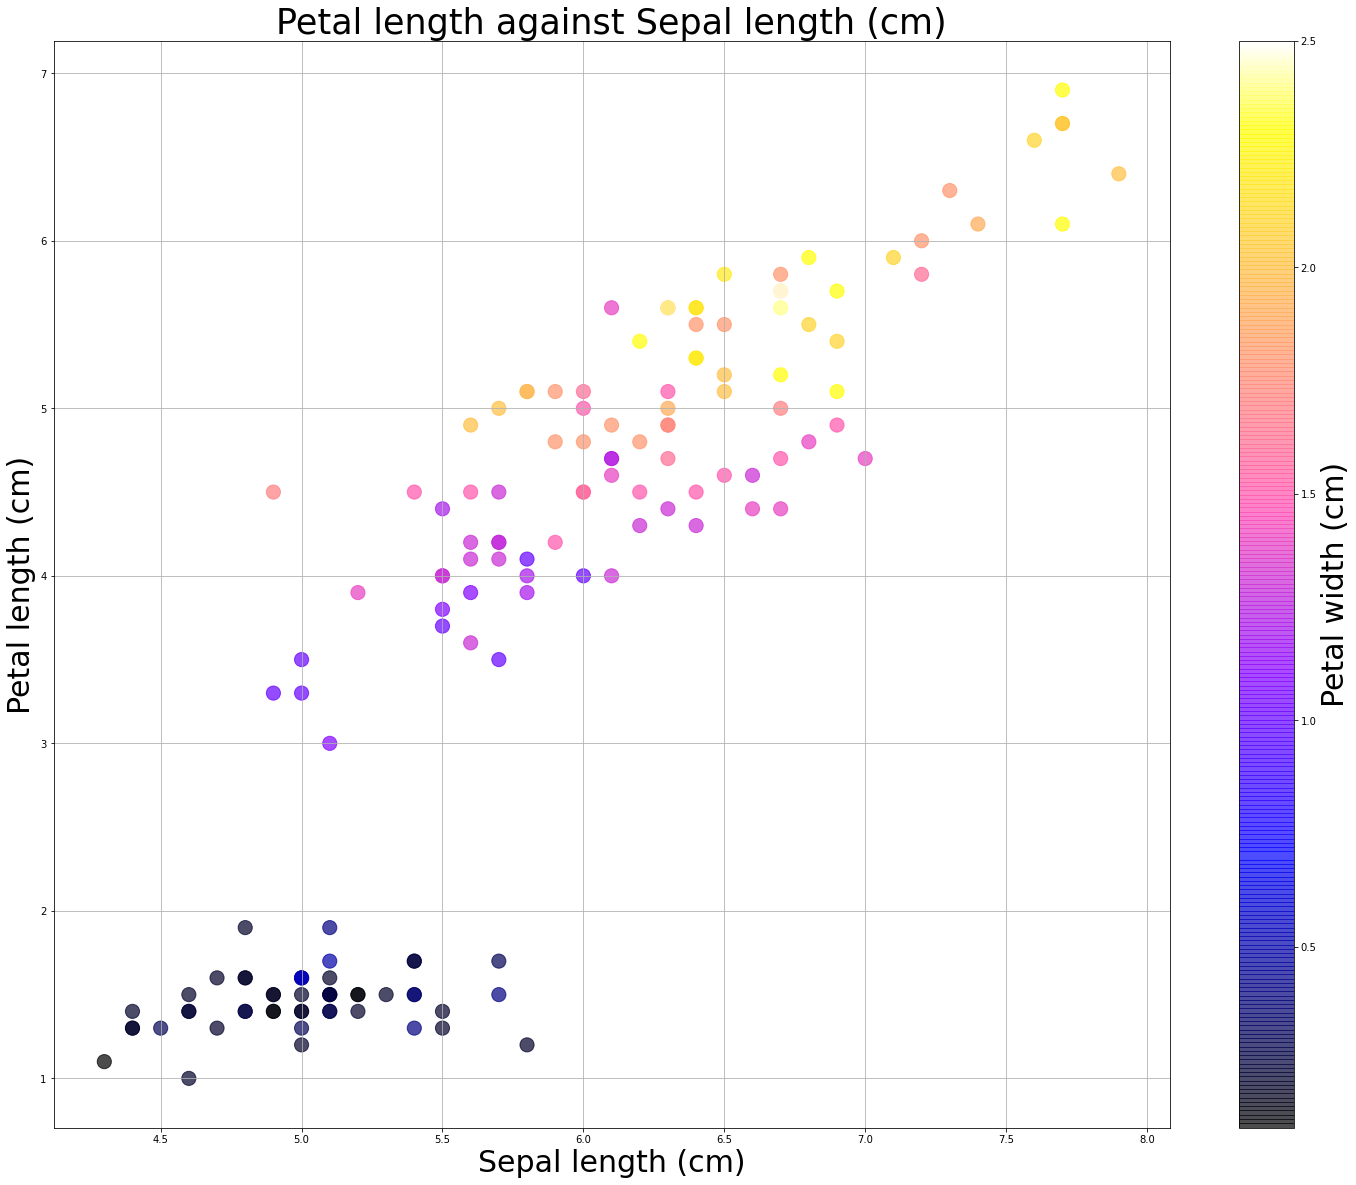

In [42]:
plt.figure(figsize=(25, 20))
plt.scatter(iris_df["sepal length (cm)"], # x
            iris_df["petal length (cm)"], # y
            s=200, # point size
            alpha=0.7, # transparency
            c=iris_df["petal width (cm)"], # third dim
            cmap="gnuplot2" # colour scheme for third dim
           )
plt.title('Petal length against Sepal length (cm)', fontsize=35)
plt.xlabel('Sepal length (cm)', fontsize=30)
plt.ylabel('Petal length (cm)', fontsize=30)
cb = plt.colorbar()
cb.set_label("Petal width (cm)", fontsize=30)
plt.grid(True)

### contour plot

[Back to top](#Plotting-and-Visualisation)

### heatmap

[Back to top](#Plotting-and-Visualisation)

Good for correlation matrices.

Text(0.5, 1.0, 'Correlation Matrix')

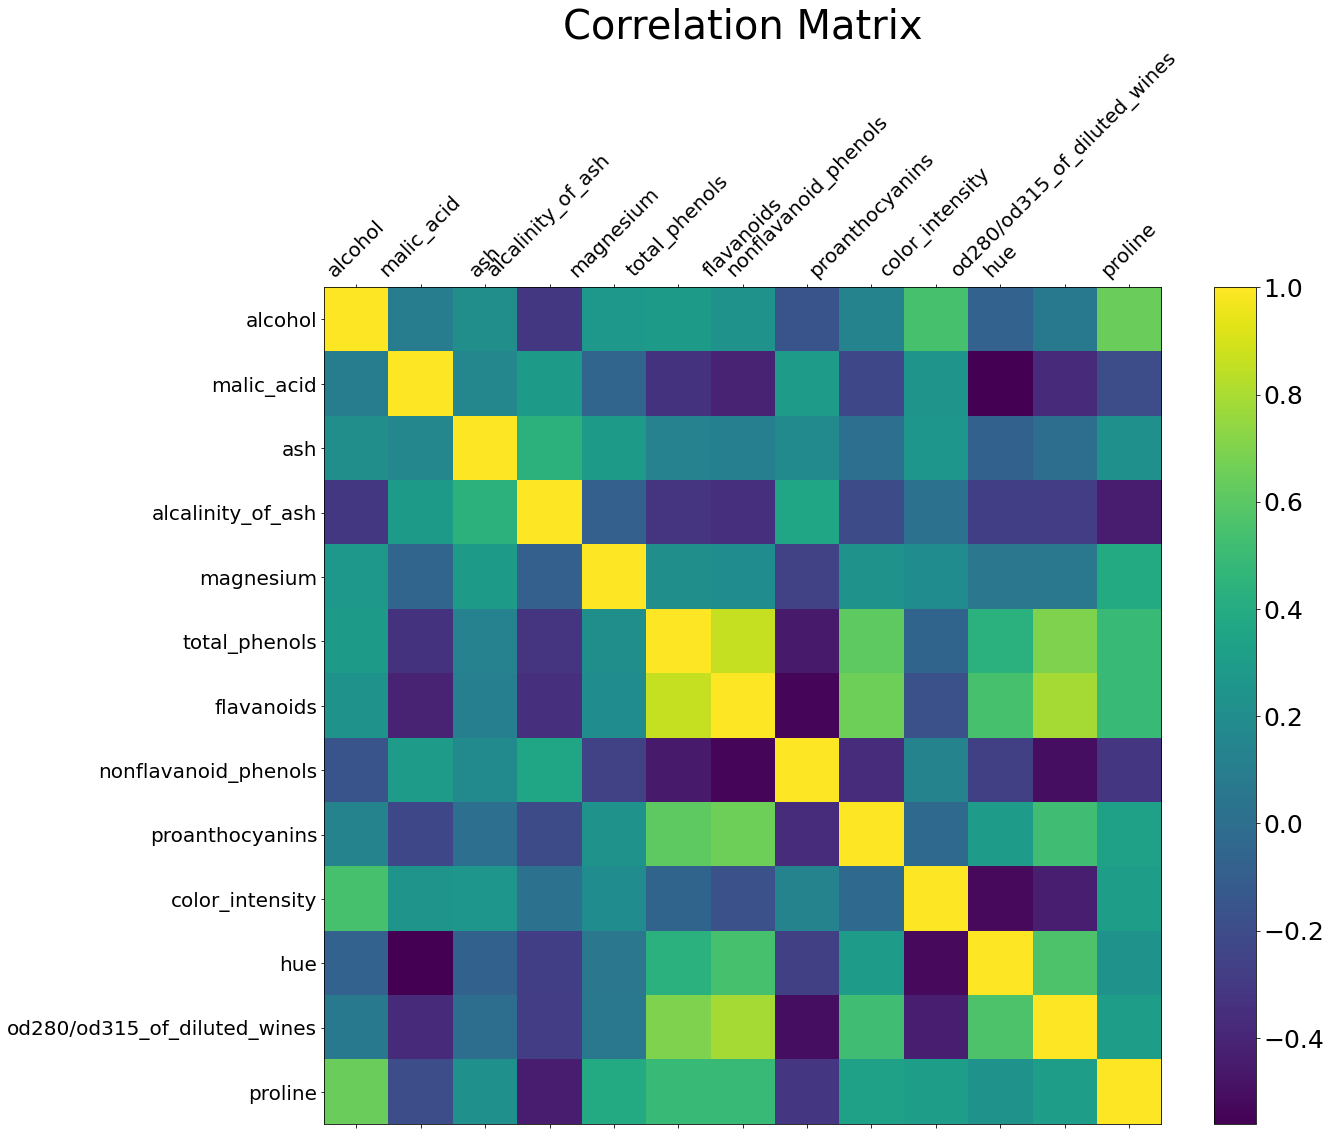

In [54]:
f = plt.figure(figsize=(19, 15))
# Heatmap
plt.matshow(wine_df.corr(), fignum=f.number, cmap ='viridis')
# Axis labels
plt.xticks(range(13), wine_df.columns, rotation=45, fontsize=20) 
plt.yticks(range(13), wine_df.columns, fontsize=20) 
# Colour bar
cb = plt.colorbar()
cb.ax.tick_params(labelsize=25)
# Title
plt.title('Correlation Matrix', fontsize=40)

### boxplots

[Back to top](#Plotting-and-Visualisation)

### regression graph

[Back to top](#Plotting-and-Visualisation)

### line graph

[Back to top](#Plotting-and-Visualisation)

In [ ]:
# df.plot(x="cola", y="colb", kind="line")
# Rotate x-axis labels by 45 degrees
# df.plot(x="cola", y="colb", kind="line", rot=45)

| Point type (`marker=`) | What |
| --- | --- |
| `^` | Filled triangle |
| `D` | Filled diamond |
| `o` | Filled circle |
| `s` | Filled square|

Text(0.5, 1.0, 'Wine properties for each observation')

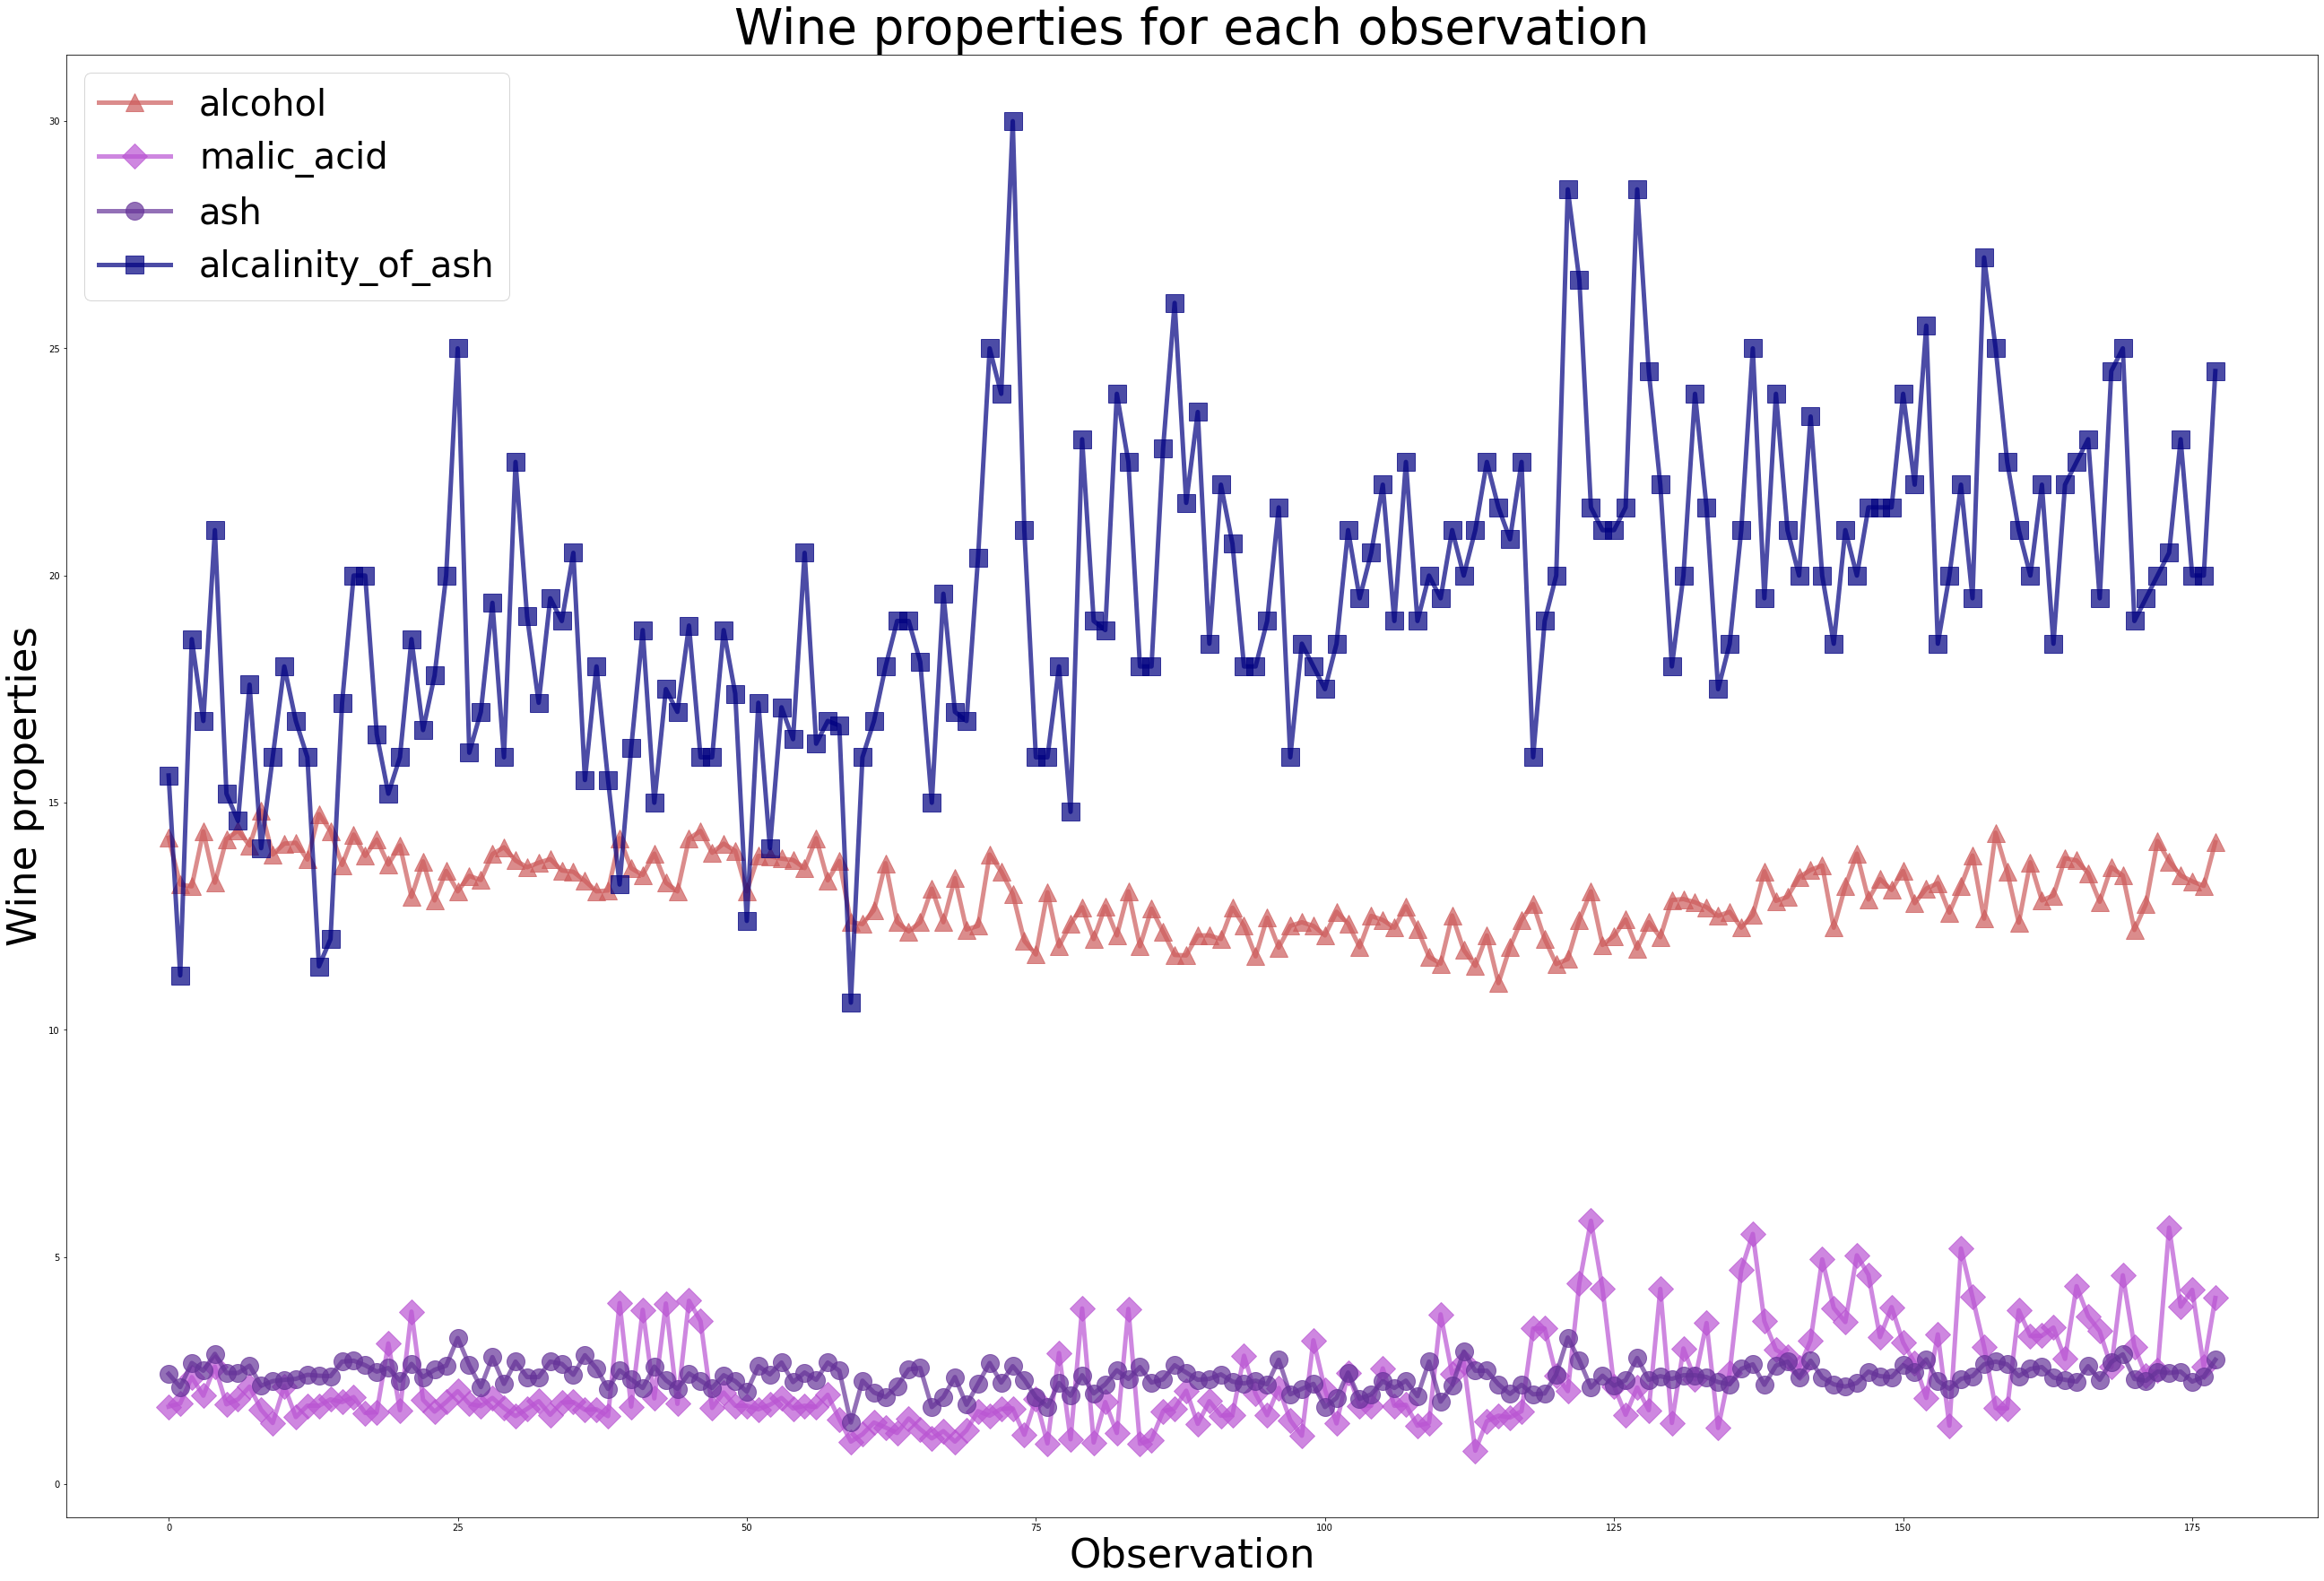

In [65]:
plt.figure(figsize=(45,30)) # width, height
# Plot line graphs
plt.plot('alcohol',
         data=wine_df,
         marker='^', # point type
         alpha=.7, #transparency
         markersize=20, # point size
         color='indianred', # point colour
         linewidth=5) # line thickness
plt.plot('malic_acid', data=wine_df, marker='D',alpha=.7, markersize=20, color='mediumorchid', linewidth=5)
plt.plot('ash', data=wine_df, marker='o',alpha=.7, markersize=20, color='rebeccapurple', linewidth=5)
plt.plot('alcalinity_of_ash', data=wine_df, marker='s',alpha=.7, markersize=20, color='navy', linewidth=5)
# Legend
plt.legend(prop={'size':40})
# Axis labels
plt.xlabel('Observation', fontsize=45)
plt.ylabel('Wine properties', fontsize=45)
plt.title('Wine properties for each observation', fontsize=55)
# Save graph
#plt.savefig('linegraph_matplot.png')

### barchart

[Back to top](#Plotting-and-Visualisation)

In [ ]:
# df["cola"].plot(kind="bar", title=___)

### polar barchart

[Back to top](#Plotting-and-Visualisation)

### histogram

[Back to top](#Plotting-and-Visualisation)

In [ ]:
# df["cola"].hist()
# df["cola"].hist(bins=___)

Overlay histogram:

In [ ]:
# df[df["colc"] == 'F']["cola"].hist(alpha=0.7)
# df[df["colc"] == 'M']["cola"].hist(alpha=0.7)
# plt.legend(["F", "M"]) # legend

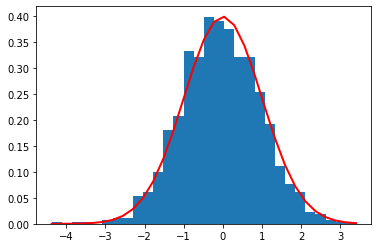

In [70]:
normal_data = np.random.normal(0, 1, 1000) # mean 0, stddev 0, num obs 1000
counts, bins, ignored = plt.hist(x=normal_data,
                                 bins=30, # if int: num of equal-width bins
                                          # if sequence: bin edges (left-inclusive)
                                 density=True) # return probability density
mu = 0 # mean
sigma = 1 # stddev
plt.plot(bins, 
         1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2,
         color='r')